In [30]:
from defsent import DefSent
import pandas as pd
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [31]:
def_senteval = [[80.94 ,87.57 ,94.59, 89.98, 85.78, 89.73, 73.82, 86.06],
[85.79 ,90.54 ,95.58, 90.15, 91.17, 90.47, 73.74, 88.20],
[83.94 ,90.44 ,94.05, 90.70, 89.16, 90.80, 75.52, 87.80],
[86.47 ,91.53 ,95.02, 91.15, 90.77, 92.33, 73.91, 88.74]]
list_model = ['defsent-bert-base-uncased-cls',

              'defsent-bert-large-uncased-cls',

              'defsent-roberta-base-cls',

              'defsent-roberta-large-cls']

In [32]:
def_senteval = pd.DataFrame(def_senteval, columns=["MR",
            "CR",
            "SUBJ",
            "MPQA",
            "SST2",
            "TREC",
            "MRPC",
            'Avg'])
def_senteval['Model'] = list_model
def_senteval.head(4)

,MR,CR,SUBJ,MPQA,SST2,TREC,MRPC,Avg,Model
0,80.94,87.57,94.59,89.98,85.78,89.73,73.82,86.06,defsent-bert-base-uncased-cls
1,85.79,90.54,95.58,90.15,91.17,90.47,73.74,88.20,defsent-bert-large-uncased-cls
2,83.94,90.44,94.05,90.70,89.16,90.80,75.52,87.80,defsent-roberta-base-cls
3,86.47,91.53,95.02,91.15,90.77,92.33,73.91,88.74,defsent-roberta-large-cls


In [33]:
eval_list = [{'MR': {'devacc': 81.05, 'acc': 80.64, 'ndev': 10662.0, 'ntest': 10662.0},
  'CR': {'devacc': 87.63, 'acc': 86.6, 'ndev': 3775.0, 'ntest': 3775.0},
  'SUBJ': {'devacc': 94.28, 'acc': 93.78, 'ndev': 10000.0, 'ntest': 10000.0},
  'MPQA': {'devacc': 89.69, 'acc': 89.37, 'ndev': 10606.0, 'ntest': 10606.0},
  'SST2': {'devacc': 85.21, 'acc': 85.45, 'ndev': 872.0, 'ntest': 1821.0},
  'TREC': {'devacc': 85.36, 'acc': 84.2, 'ndev': 5452.0, 'ntest': 500.0},
  'MRPC': {'devacc': 72.55,
   'acc': 72.93,
   'f1': 81.89,
   'ndev': 4076.0,
   'ntest': 1725.0},
  'SICKEntailment': {'devacc': 80.6,
   'acc': 81.14,
   'ndev': 500.0,
   'ntest': 4927.0}},
 {'MR': {'devacc': 81.72, 'acc': 81.53, 'ndev': 10662.0, 'ntest': 10662.0},
  'CR': {'devacc': 88.31, 'acc': 87.31, 'ndev': 3775.0, 'ntest': 3775.0},
  'SUBJ': {'devacc': 94.92, 'acc': 94.37, 'ndev': 10000.0, 'ntest': 10000.0},
  'MPQA': {'devacc': 90.01, 'acc': 89.68, 'ndev': 10606.0, 'ntest': 10606.0},
  'SST2': {'devacc': 85.89, 'acc': 86.16, 'ndev': 872.0, 'ntest': 1821.0},
  'TREC': {'devacc': 84.78, 'acc': 88.8, 'ndev': 5452.0, 'ntest': 500.0},
  'MRPC': {'devacc': 74.95,
   'acc': 75.77,
   'f1': 82.81,
   'ndev': 4076.0,
   'ntest': 1725.0},
  'SICKEntailment': {'devacc': 83.8,
   'acc': 82.61,
   'ndev': 500.0,
   'ntest': 4927.0}},
 {'MR': {'devacc': 80.95, 'acc': 80.5, 'ndev': 10662.0, 'ntest': 10662.0},
  'CR': {'devacc': 88.06, 'acc': 86.49, 'ndev': 3775.0, 'ntest': 3775.0},
  'SUBJ': {'devacc': 94.39, 'acc': 94.03, 'ndev': 10000.0, 'ntest': 10000.0},
  'MPQA': {'devacc': 89.87, 'acc': 89.73, 'ndev': 10606.0, 'ntest': 10606.0},
  'SST2': {'devacc': 86.58, 'acc': 85.56, 'ndev': 872.0, 'ntest': 1821.0},
  'TREC': {'devacc': 84.08, 'acc': 85.8, 'ndev': 5452.0, 'ntest': 500.0},
  'MRPC': {'devacc': 74.95,
   'acc': 73.33,
   'f1': 81.86,
   'ndev': 4076.0,
   'ntest': 1725.0},
  'SICKEntailment': {'devacc': 84.4,
   'acc': 82.24,
   'ndev': 500.0,
   'ntest': 4927.0}},
 {'MR': {'devacc': 85.79, 'acc': 85.24, 'ndev': 10662.0, 'ntest': 10662.0},
  'CR': {'devacc': 90.64, 'acc': 90.09, 'ndev': 3775.0, 'ntest': 3775.0},
  'SUBJ': {'devacc': 95.56, 'acc': 95.06, 'ndev': 10000.0, 'ntest': 10000.0},
  'MPQA': {'devacc': 90.32, 'acc': 89.7, 'ndev': 10606.0, 'ntest': 10606.0},
  'SST2': {'devacc': 90.71, 'acc': 90.55, 'ndev': 872.0, 'ntest': 1821.0},
  'TREC': {'devacc': 85.62, 'acc': 91.0, 'ndev': 5452.0, 'ntest': 500.0},
  'MRPC': {'devacc': 73.58,
   'acc': 73.62,
   'f1': 81.22,
   'ndev': 4076.0,
   'ntest': 1725.0},
  'SICKEntailment': {'devacc': 81.8,
   'acc': 81.73,
   'ndev': 500.0,
   'ntest': 4927.0}},
 {'MR': {'devacc': 84.87, 'acc': 84.39, 'ndev': 10662.0, 'ntest': 10662.0},
  'CR': {'devacc': 90.05, 'acc': 88.95, 'ndev': 3775.0, 'ntest': 3775.0},
  'SUBJ': {'devacc': 95.38, 'acc': 94.8, 'ndev': 10000.0, 'ntest': 10000.0},
  'MPQA': {'devacc': 90.19, 'acc': 89.86, 'ndev': 10606.0, 'ntest': 10606.0},
  'SST2': {'devacc': 88.42, 'acc': 89.95, 'ndev': 872.0, 'ntest': 1821.0},
  'TREC': {'devacc': 83.44, 'acc': 87.8, 'ndev': 5452.0, 'ntest': 500.0},
  'MRPC': {'devacc': 74.39,
   'acc': 74.61,
   'f1': 82.96,
   'ndev': 4076.0,
   'ntest': 1725.0},
  'SICKEntailment': {'devacc': 81.2,
   'acc': 78.91,
   'ndev': 500.0,
   'ntest': 4927.0}},
 {'MR': {'devacc': 83.41, 'acc': 83.08, 'ndev': 10662.0, 'ntest': 10662.0},
  'CR': {'devacc': 89.33, 'acc': 88.93, 'ndev': 3775.0, 'ntest': 3775.0},
  'SUBJ': {'devacc': 94.17, 'acc': 93.56, 'ndev': 10000.0, 'ntest': 10000.0},
  'MPQA': {'devacc': 90.04, 'acc': 89.74, 'ndev': 10606.0, 'ntest': 10606.0},
  'SST2': {'devacc': 88.99, 'acc': 87.31, 'ndev': 872.0, 'ntest': 1821.0},
  'TREC': {'devacc': 82.54, 'acc': 84.6, 'ndev': 5452.0, 'ntest': 500.0},
  'MRPC': {'devacc': 74.98,
   'acc': 76.17,
   'f1': 82.94,
   'ndev': 4076.0,
   'ntest': 1725.0},
  'SICKEntailment': {'devacc': 83.4,
   'acc': 81.73,
   'ndev': 500.0,
   'ntest': 4927.0}},
 {'MR': {'devacc': 84.12, 'acc': 83.55, 'ndev': 10662.0, 'ntest': 10662.0},
  'CR': {'devacc': 90.24, 'acc': 88.79, 'ndev': 3775.0, 'ntest': 3775.0},
  'SUBJ': {'devacc': 93.46, 'acc': 92.91, 'ndev': 10000.0, 'ntest': 10000.0},
  'MPQA': {'devacc': 90.83, 'acc': 90.54, 'ndev': 10606.0, 'ntest': 10606.0},
  'SST2': {'devacc': 87.73, 'acc': 89.95, 'ndev': 872.0, 'ntest': 1821.0},
  'TREC': {'devacc': 82.02, 'acc': 87.6, 'ndev': 5452.0, 'ntest': 500.0},
  'MRPC': {'devacc': 75.49,
   'acc': 74.9,
   'f1': 82.96,
   'ndev': 4076.0,
   'ntest': 1725.0},
  'SICKEntailment': {'devacc': 83.2,
   'acc': 81.57,
   'ndev': 500.0,
   'ntest': 4927.0}},
 {'MR': {'devacc': 84.82, 'acc': 84.16, 'ndev': 10662.0, 'ntest': 10662.0},
  'CR': {'devacc': 90.94, 'acc': 89.46, 'ndev': 3775.0, 'ntest': 3775.0},
  'SUBJ': {'devacc': 94.29, 'acc': 93.88, 'ndev': 10000.0, 'ntest': 10000.0},
  'MPQA': {'devacc': 90.91, 'acc': 90.07, 'ndev': 10606.0, 'ntest': 10606.0},
  'SST2': {'devacc': 88.76, 'acc': 89.9, 'ndev': 872.0, 'ntest': 1821.0},
  'TREC': {'devacc': 83.49, 'acc': 88.6, 'ndev': 5452.0, 'ntest': 500.0},
  'MRPC': {'devacc': 76.4,
   'acc': 75.88,
   'f1': 83.29,
   'ndev': 4076.0,
   'ntest': 1725.0},
  'SICKEntailment': {'devacc': 83.2,
   'acc': 81.69,
   'ndev': 500.0,
   'ntest': 4927.0}},
 {'MR': {'devacc': 84.24, 'acc': 83.79, 'ndev': 10662.0, 'ntest': 10662.0},
  'CR': {'devacc': 90.52, 'acc': 88.85, 'ndev': 3775.0, 'ntest': 3775.0},
  'SUBJ': {'devacc': 93.97, 'acc': 93.29, 'ndev': 10000.0, 'ntest': 10000.0},
  'MPQA': {'devacc': 90.9, 'acc': 90.45, 'ndev': 10606.0, 'ntest': 10606.0},
  'SST2': {'devacc': 88.65, 'acc': 89.46, 'ndev': 872.0, 'ntest': 1821.0},
  'TREC': {'devacc': 85.75, 'acc': 92.0, 'ndev': 5452.0, 'ntest': 500.0},
  'MRPC': {'devacc': 77.72,
   'acc': 77.91,
   'f1': 84.72,
   'ndev': 4076.0,
   'ntest': 1725.0},
  'SICKEntailment': {'devacc': 83.8,
   'acc': 82.59,
   'ndev': 500.0,
   'ntest': 4927.0}},
 {'MR': {'devacc': 84.85, 'acc': 84.45, 'ndev': 10662.0, 'ntest': 10662.0},
  'CR': {'devacc': 90.27, 'acc': 89.09, 'ndev': 3775.0, 'ntest': 3775.0},
  'SUBJ': {'devacc': 94.54, 'acc': 94.31, 'ndev': 10000.0, 'ntest': 10000.0},
  'MPQA': {'devacc': 91.12, 'acc': 90.91, 'ndev': 10606.0, 'ntest': 10606.0},
  'SST2': {'devacc': 89.56, 'acc': 90.06, 'ndev': 872.0, 'ntest': 1821.0},
  'TREC': {'devacc': 85.09, 'acc': 93.6, 'ndev': 5452.0, 'ntest': 500.0},
  'MRPC': {'devacc': 74.63,
   'acc': 72.87,
   'f1': 81.19,
   'ndev': 4076.0,
   'ntest': 1725.0},
  'SICKEntailment': {'devacc': 82.8,
   'acc': 82.32,
   'ndev': 500.0,
   'ntest': 4927.0}},
 {'MR': {'devacc': 86.07, 'acc': 85.03, 'ndev': 10662.0, 'ntest': 10662.0},
  'CR': {'devacc': 91.13, 'acc': 90.81, 'ndev': 3775.0, 'ntest': 3775.0},
  'SUBJ': {'devacc': 95.1, 'acc': 94.71, 'ndev': 10000.0, 'ntest': 10000.0},
  'MPQA': {'devacc': 91.11, 'acc': 90.9, 'ndev': 10606.0, 'ntest': 10606.0},
  'SST2': {'devacc': 91.51, 'acc': 90.06, 'ndev': 872.0, 'ntest': 1821.0},
  'TREC': {'devacc': 85.64, 'acc': 92.8, 'ndev': 5452.0, 'ntest': 500.0},
  'MRPC': {'devacc': 74.46,
   'acc': 73.33,
   'f1': 80.27,
   'ndev': 4076.0,
   'ntest': 1725.0},
  'SICKEntailment': {'devacc': 81.4,
   'acc': 80.82,
   'ndev': 500.0,
   'ntest': 4927.0}},
 {'MR': {'devacc': 84.93, 'acc': 84.36, 'ndev': 10662.0, 'ntest': 10662.0},
  'CR': {'devacc': 91.06, 'acc': 90.38, 'ndev': 3775.0, 'ntest': 3775.0},
  'SUBJ': {'devacc': 94.39, 'acc': 93.84, 'ndev': 10000.0, 'ntest': 10000.0},
  'MPQA': {'devacc': 91.04, 'acc': 91.04, 'ndev': 10606.0, 'ntest': 10606.0},
  'SST2': {'devacc': 89.68, 'acc': 89.13, 'ndev': 872.0, 'ntest': 1821.0},
  'TREC': {'devacc': 83.6, 'acc': 86.8, 'ndev': 5452.0, 'ntest': 500.0},
  'MRPC': {'devacc': 77.23,
   'acc': 76.75,
   'f1': 82.96,
   'ndev': 4076.0,
   'ntest': 1725.0},
  'SICKEntailment': {'devacc': 82.8,
   'acc': 82.57,
   'ndev': 500.0,
   'ntest': 4927.0}}]

In [34]:
import pandas as pd
classification_tasks = [
            "MR",
            "CR",
            "SUBJ",
            "MPQA",
            "SST2",
            "TREC",
            "MRPC"
        ]
take_field = 'acc'
sent_df = []
for task in classification_tasks:
  df = pd.DataFrame([eval_list[i][task][take_field] for i in range(0,len(eval_list),3)])
  df.columns = [task]
  sent_df.append(df)
sent_df = pd.concat(sent_df, axis=1)
sent_df['Avg'] = sent_df.mean(axis=1)
sent_df['Model'] = list_model
sent_df.head(100)

,MR,CR,SUBJ,MPQA,SST2,TREC,MRPC,Avg,Model
0,80.64,86.60,93.78,89.37,85.45,84.2,72.93,84.710000,defsent-bert-base-uncased-cls
1,85.24,90.09,95.06,89.70,90.55,91.0,73.62,87.894286,defsent-bert-large-uncased-cls
2,83.55,88.79,92.91,90.54,89.95,87.6,74.90,86.891429,defsent-roberta-base-cls
3,84.45,89.09,94.31,90.91,90.06,93.6,72.87,87.898571,defsent-roberta-large-cls


In [35]:
sent_df['mode'] = 'My'
def_senteval['mode'] = 'Paper'
combined_df = pd.concat([sent_df, def_senteval])
combined_df.head(100)

,MR,CR,SUBJ,MPQA,SST2,TREC,MRPC,Avg,Model,mode
0,80.64,86.60,93.78,89.37,85.45,84.20,72.93,84.710000,defsent-bert-base-uncased-cls,My
1,85.24,90.09,95.06,89.70,90.55,91.00,73.62,87.894286,defsent-bert-large-uncased-cls,My
2,83.55,88.79,92.91,90.54,89.95,87.60,74.90,86.891429,defsent-roberta-base-cls,My
3,84.45,89.09,94.31,90.91,90.06,93.60,72.87,87.898571,defsent-roberta-large-cls,My
0,80.94,87.57,94.59,89.98,85.78,89.73,73.82,86.060000,defsent-bert-base-uncased-cls,Paper
1,85.79,90.54,95.58,90.15,91.17,90.47,73.74,88.200000,defsent-bert-large-uncased-cls,Paper
2,83.94,90.44,94.05,90.70,89.16,90.80,75.52,87.800000,defsent-roberta-base-cls,Paper
3,86.47,91.53,95.02,91.15,90.77,92.33,73.91,88.740000,defsent-roberta-large-cls,Paper


In [41]:
def plot_compare(df, name_data, hue=None):
  plt.figure(figsize=(25,10))
  sns.barplot(df, x='Model', y=name_data, hue=hue)
  plt.title(f"Comparision between my exprimental and paper's exprimental on {name_data} Task.", fontsize=30)
  plt.xticks(fontsize=10, rotation=20)
  plt.show()

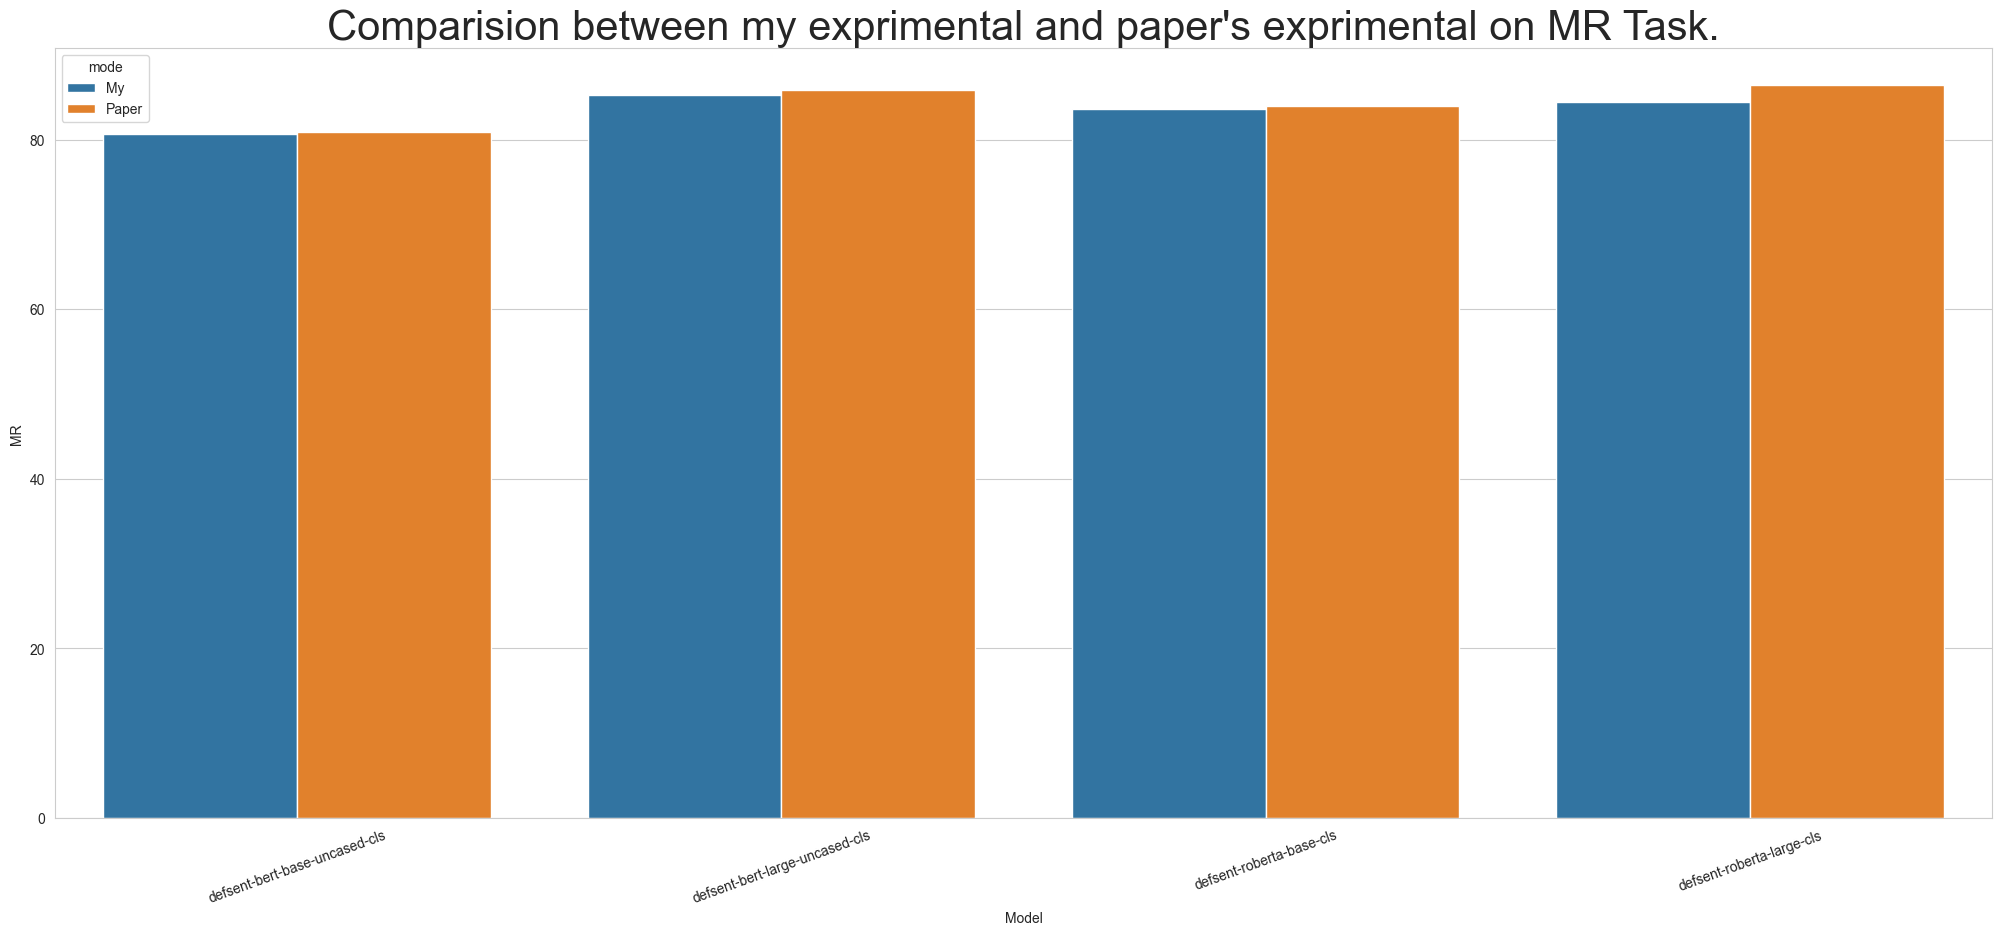

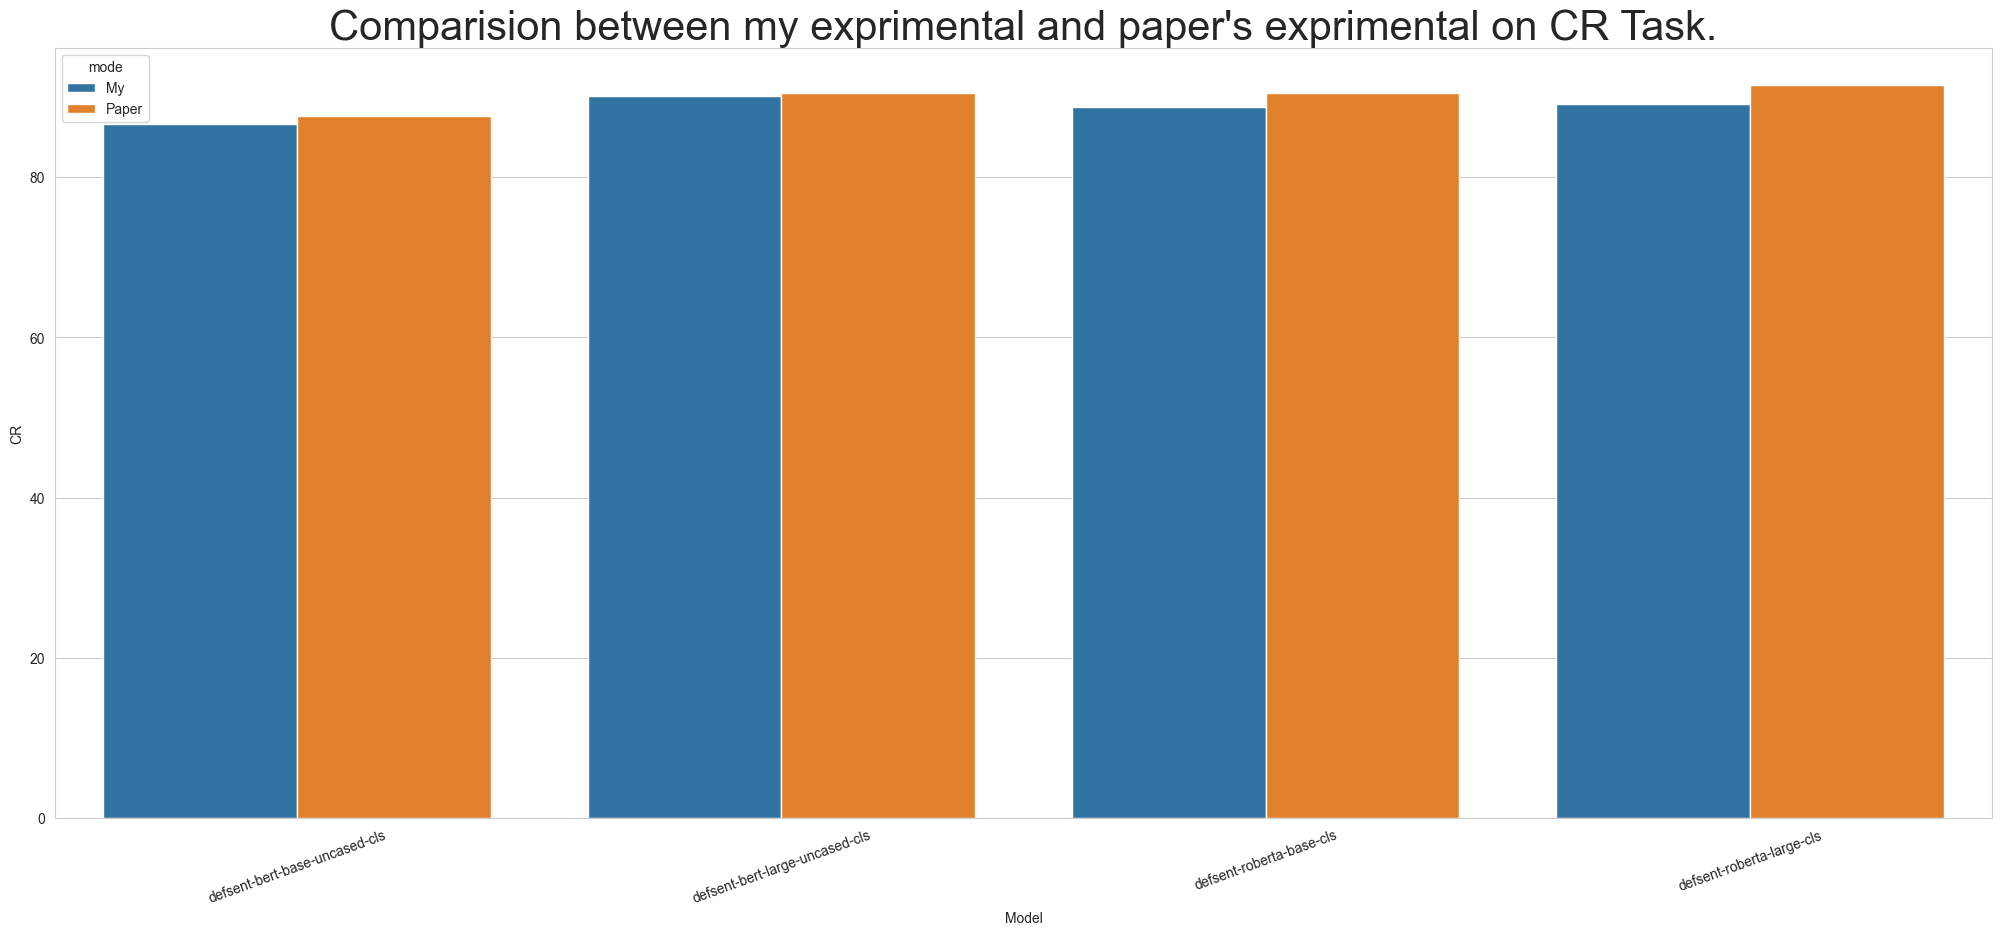

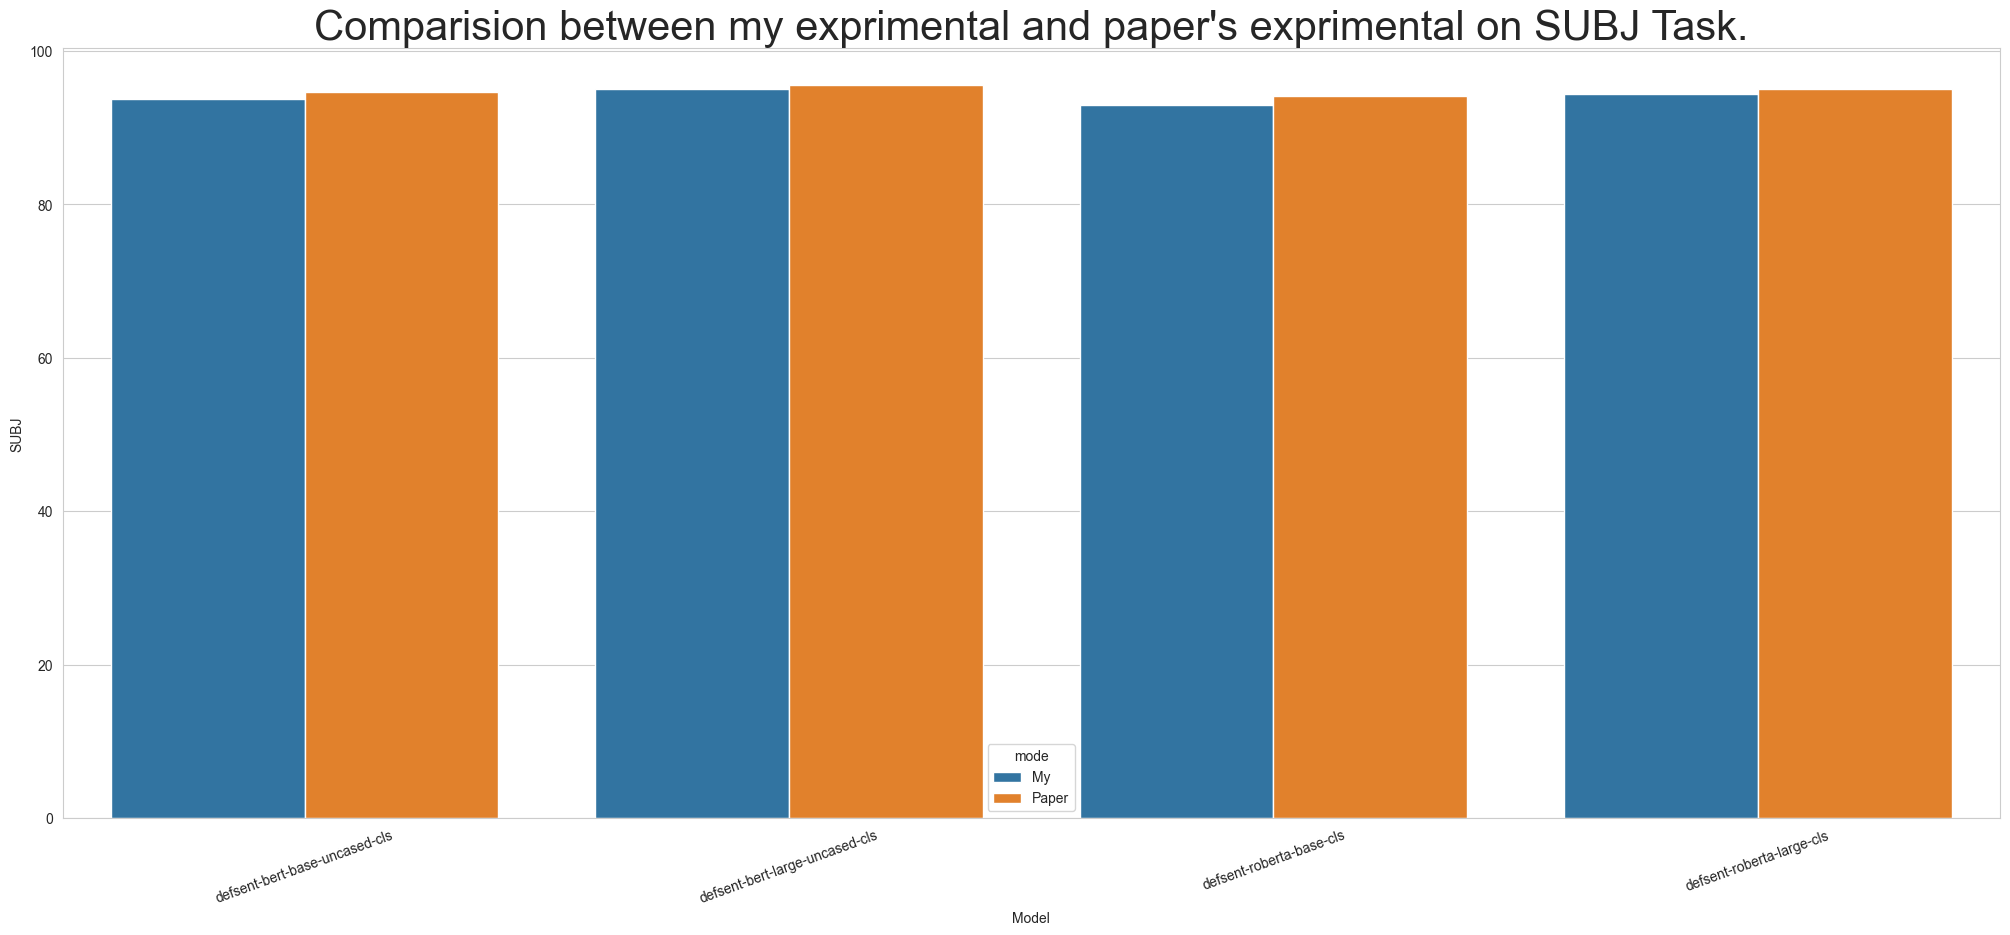

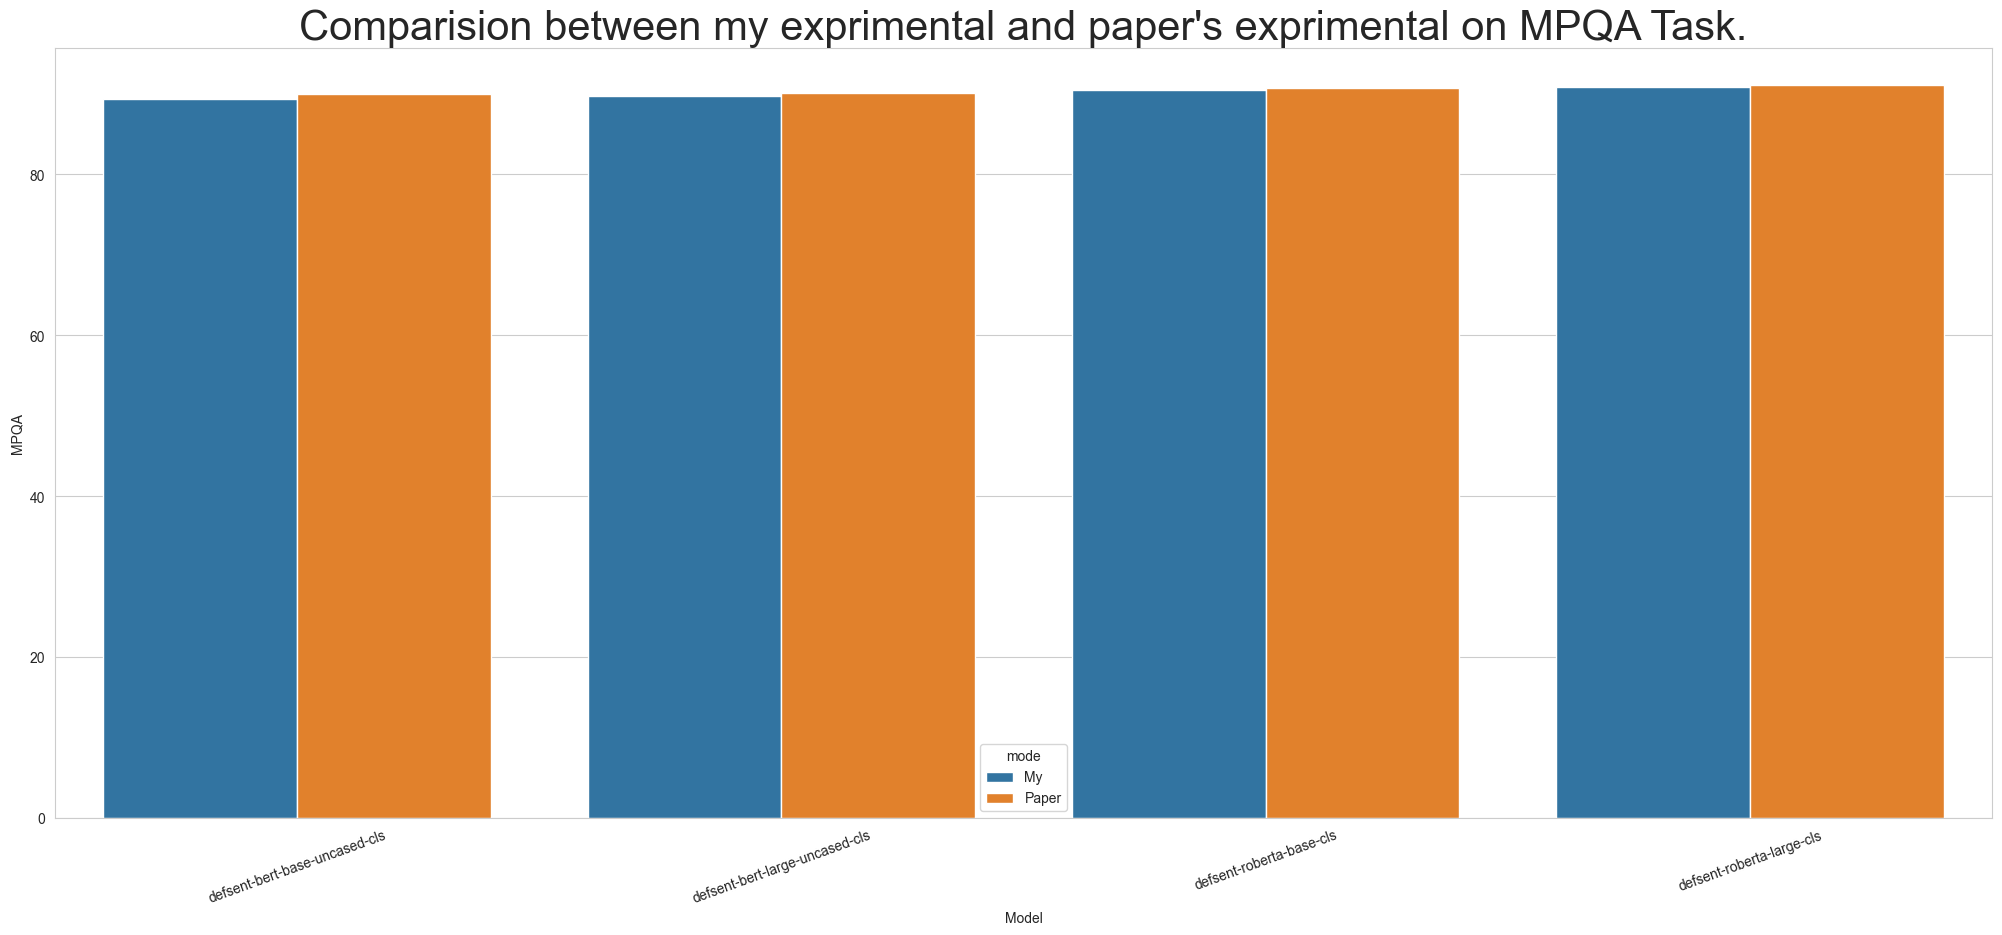

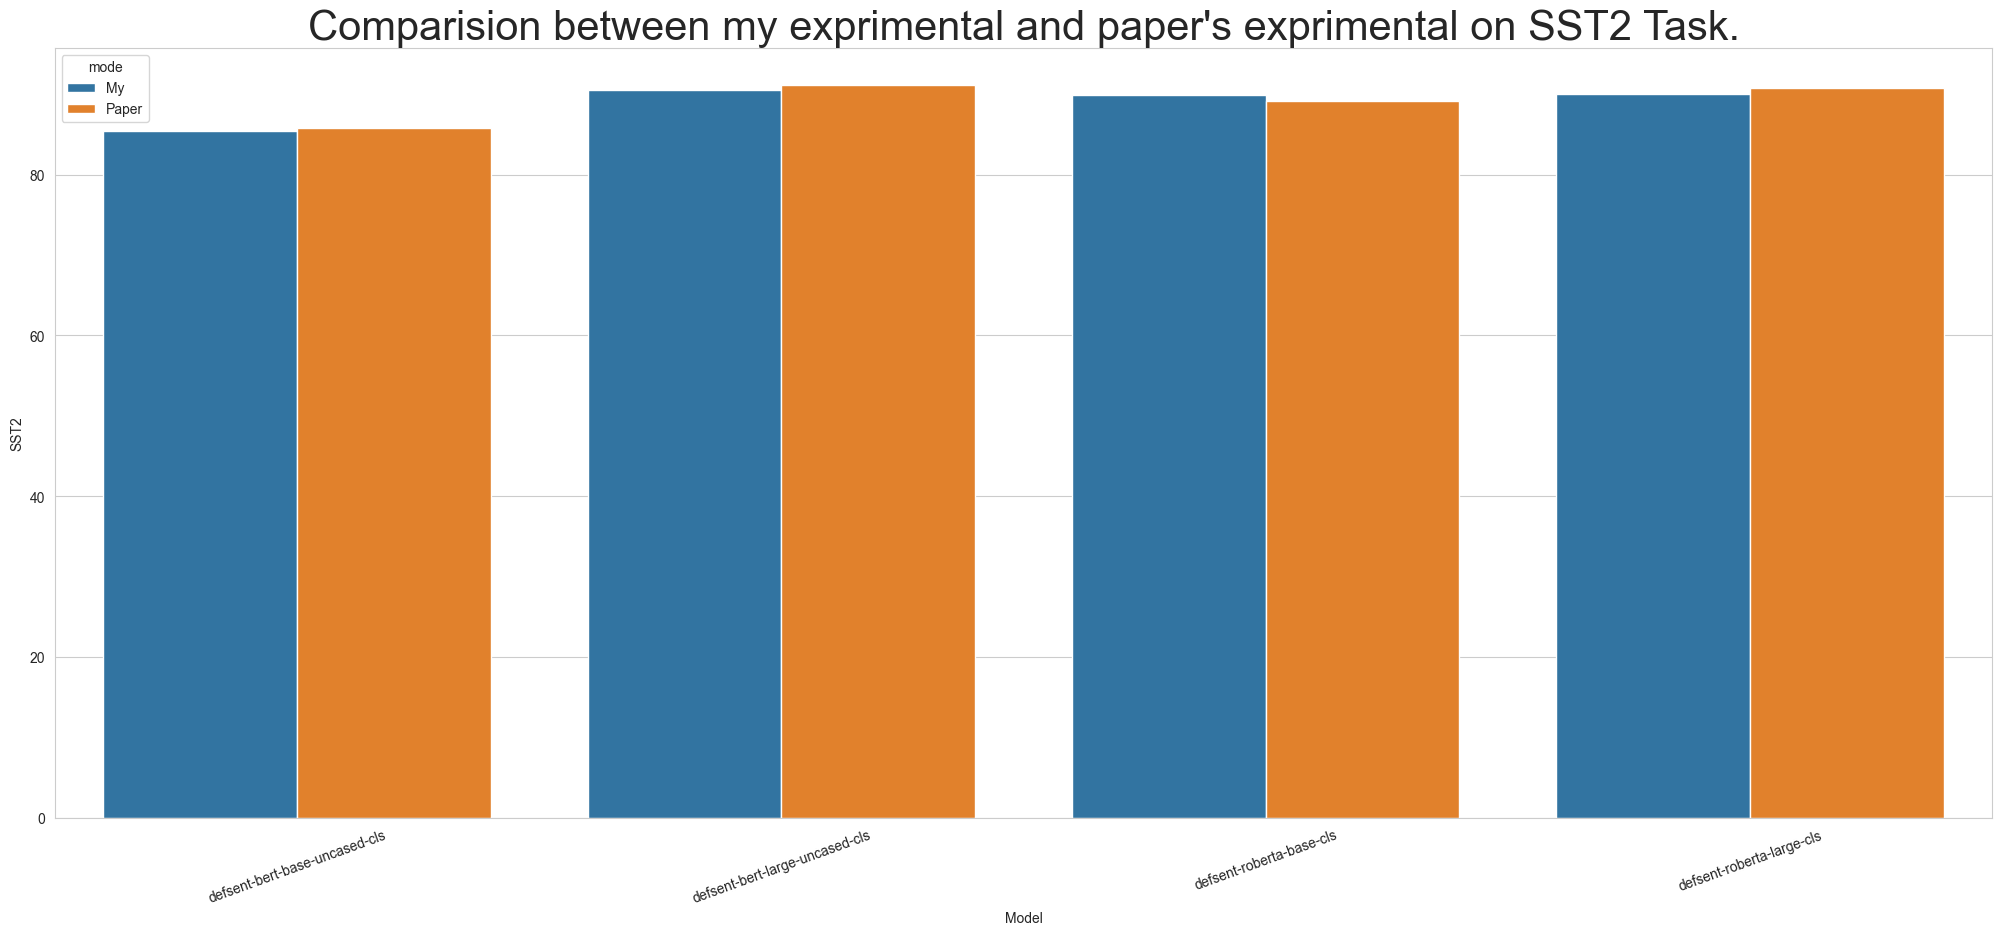

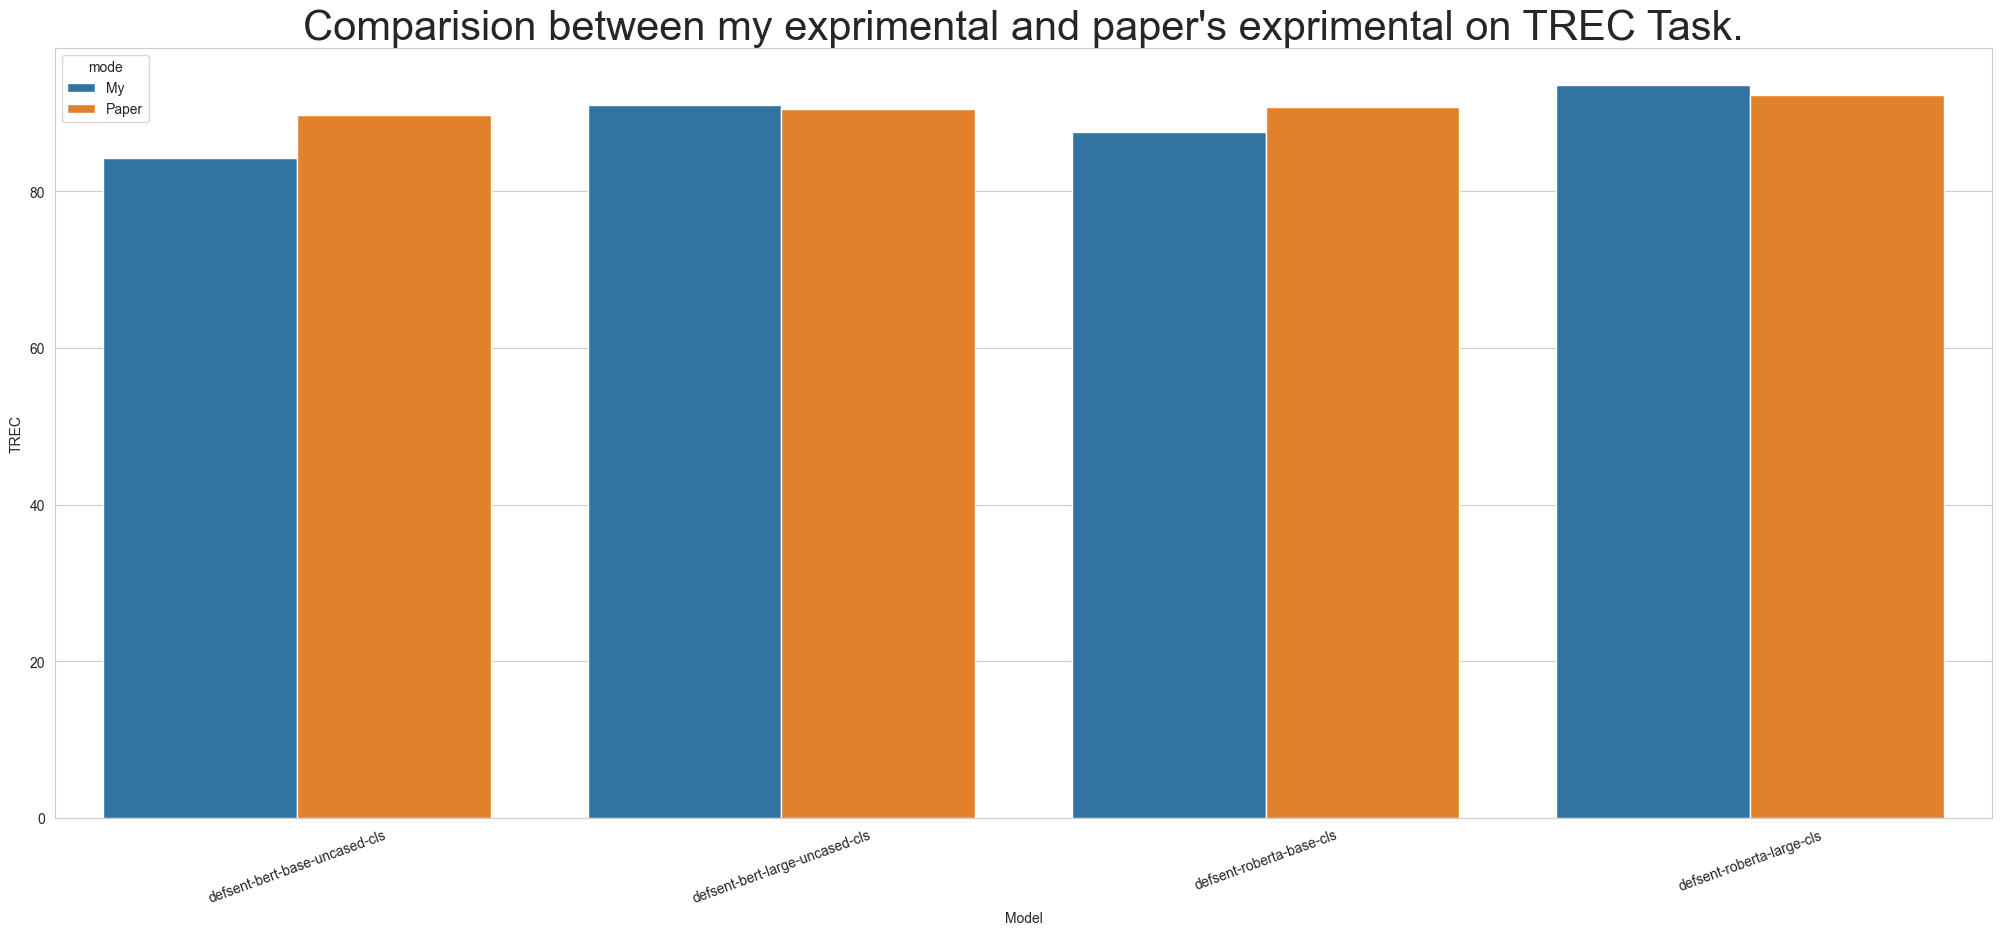

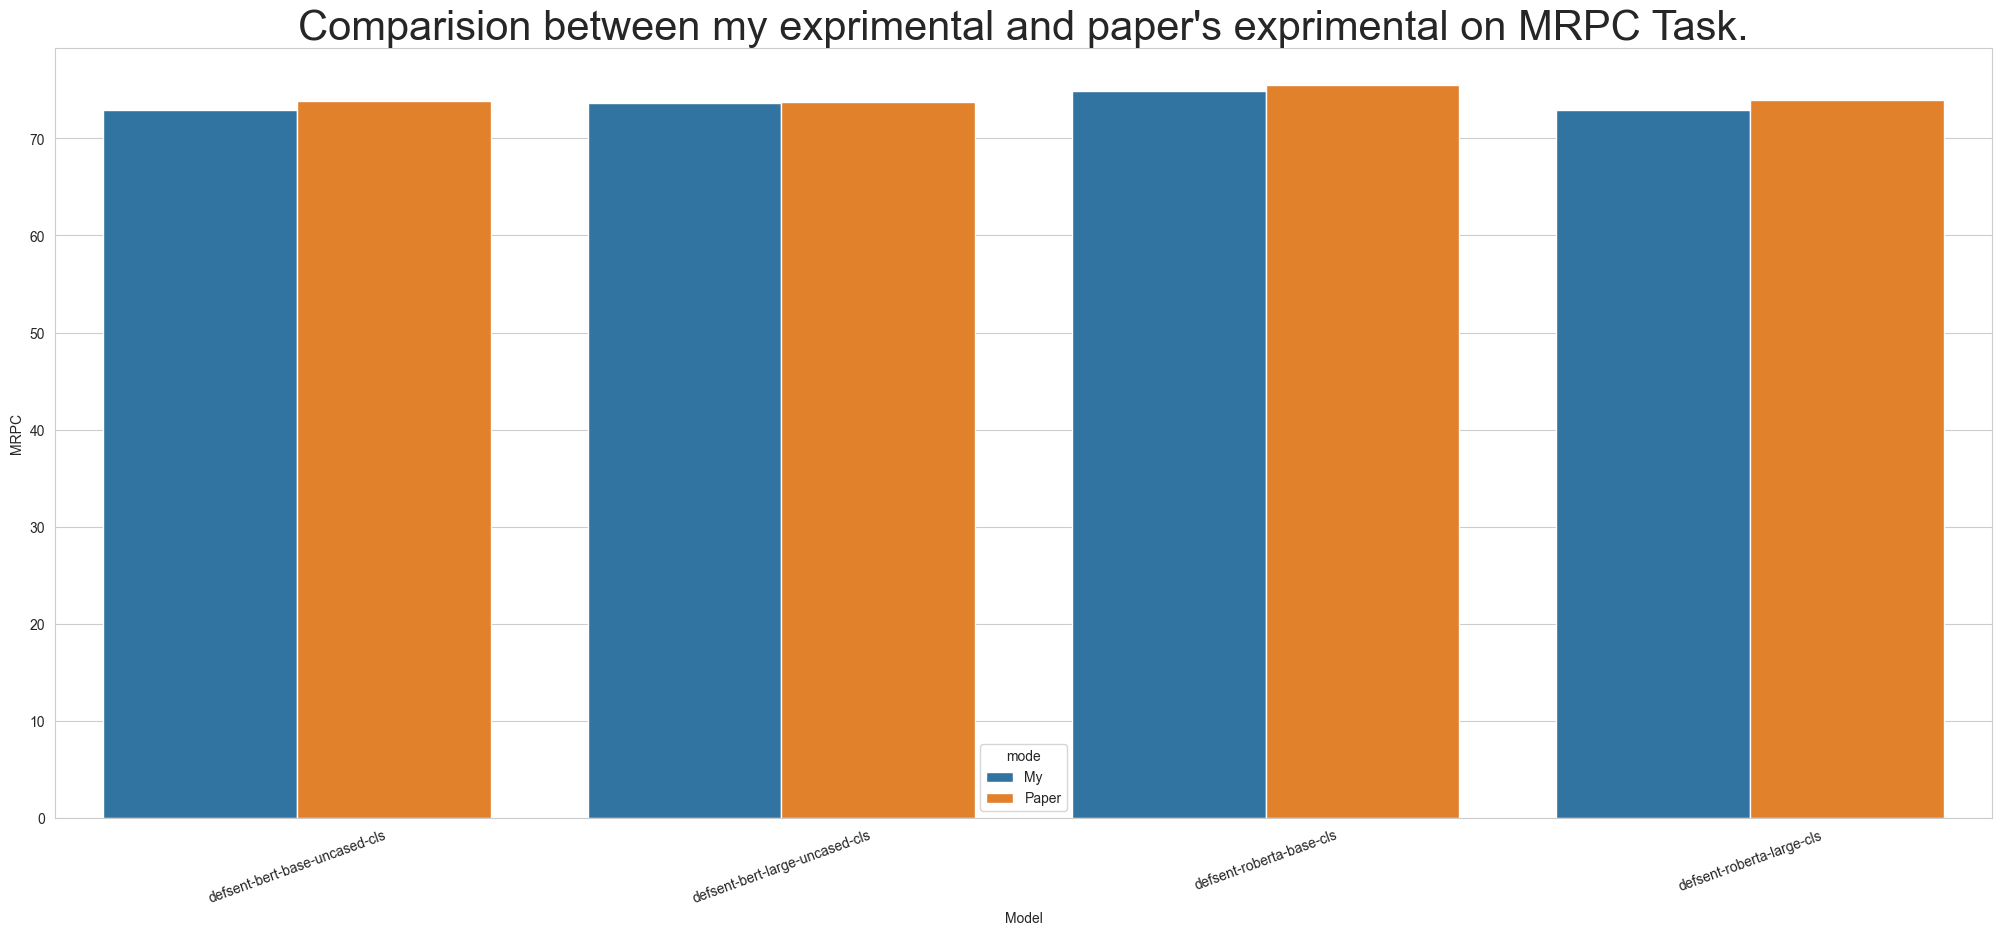

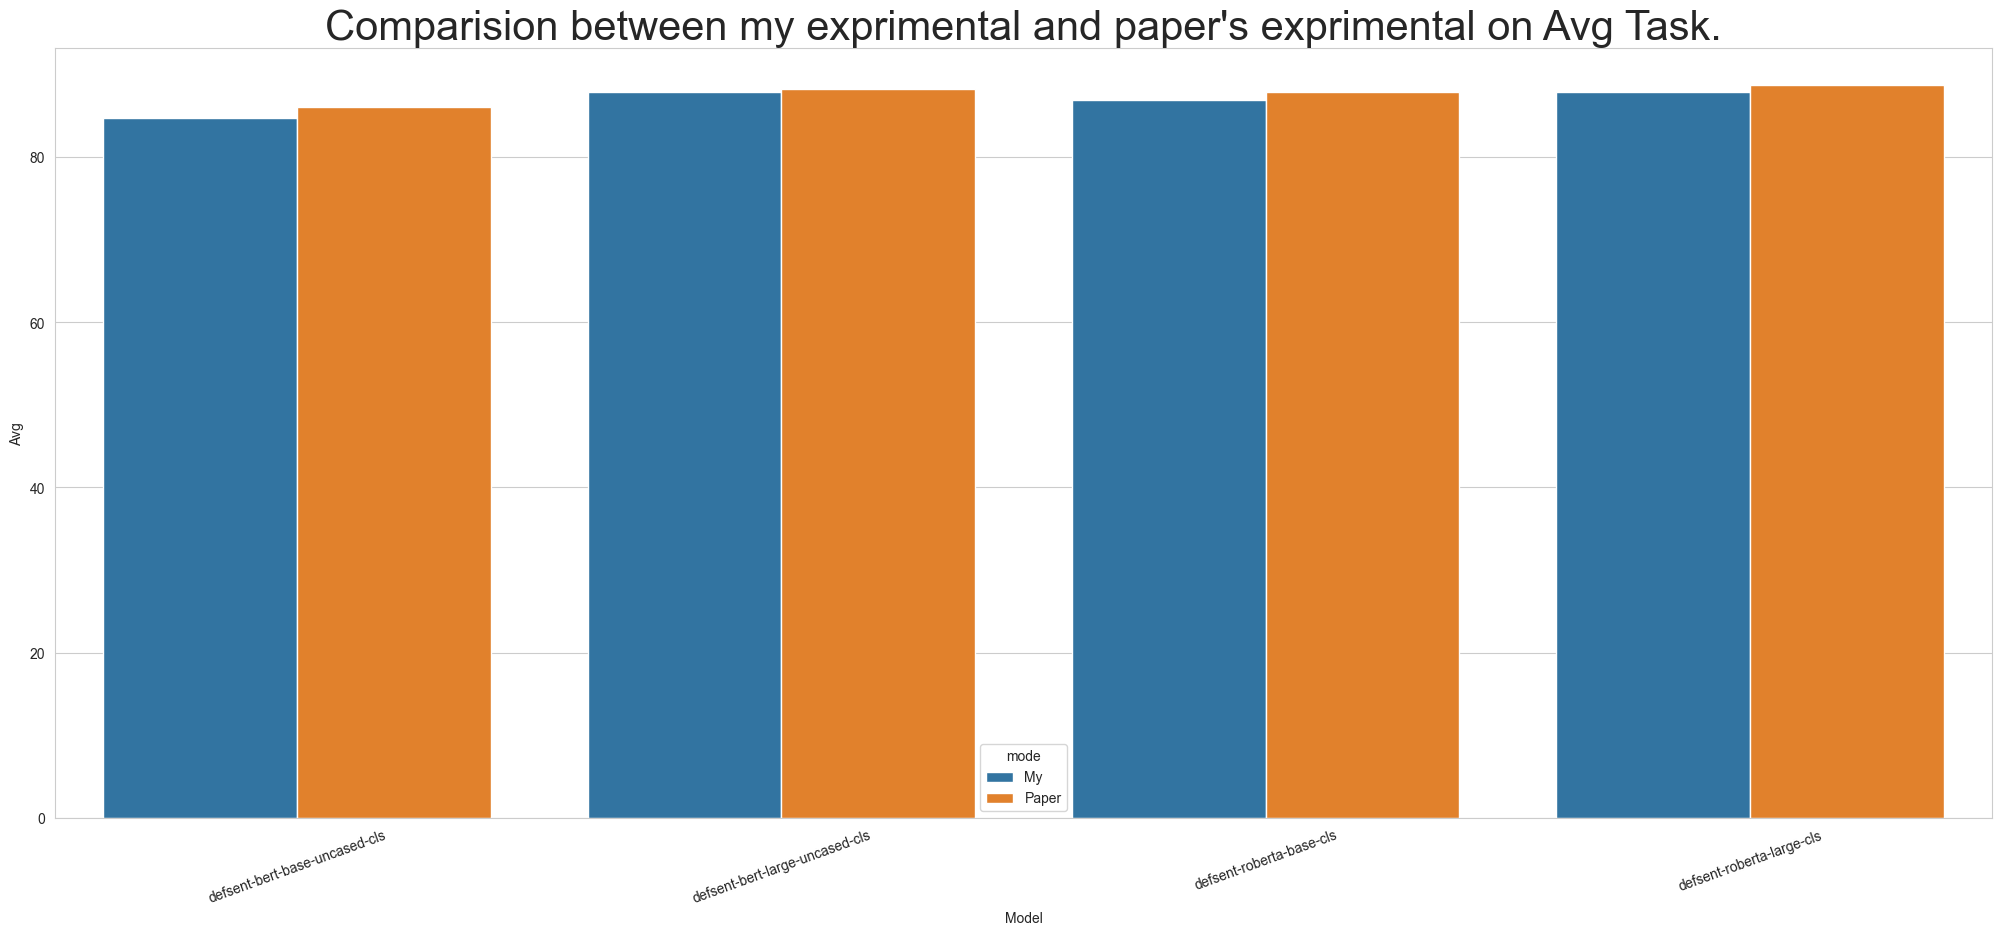

In [43]:
for data_name in classification_tasks + ['Avg']:
  plot_compare(combined_df, data_name, 'mode')